#### Sandeep Kumar Sharma
#### LGM-VIP October (Data Science Intern)
#### Beginner Level Task-2
#### Stock Market Prediction And Forecasting Using Stacked LSTM
#### Dataset Link: [Dataset](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)

#### Notebook link [Github](https://github.com/Sandeep04sharma/LGMVIP-DataScience/upload/main/Stock_pred_LSTM)

In [1]:
#If u are running it in colab, u have to mount first.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/LGMVIP/stock price using lstm 
#change directory according to your drive folder location

Mounted at /content/drive
/content/drive/MyDrive/LGMVIP/stock price using lstm


#### import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
#To Create the stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

Load the data

In [128]:
#read the csv data file
data=pd.read_csv('NSE-TATAGLOBAL.csv',index_col=0, parse_dates=True)

In [129]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41


In [130]:
data=data.sort_values(by='Date')
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [131]:
data.isna().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
# data.reset_index(inplace=True)

In [133]:
data.tail(15)


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-06,224.00,225.00,218.20,220.95,221.05,1738824,3856.72
2018-09-07,221.00,224.50,219.10,223.15,222.95,1232507,2742.84
2018-09-10,222.50,235.15,220.65,221.05,222.00,7514106,17130.29
2018-09-11,222.50,225.40,214.85,216.35,216.00,3508990,7735.81
2018-09-12,216.35,223.70,212.65,221.65,222.65,4570939,10002.01
2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50
2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78


In [134]:
df1=data['Close']

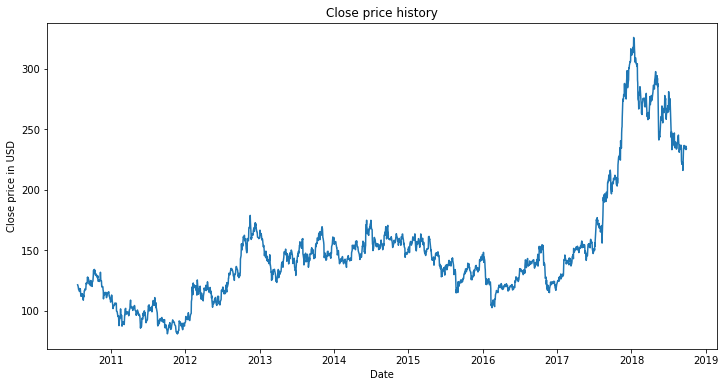

In [135]:
#visualize the closing price history
plt.figure(figsize=(12,6))
plt.title('Close price history')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price in USD')
plt.show()

In [136]:
df1

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-09-24    233.30
2018-09-25    236.10
2018-09-26    234.25
2018-09-27    233.25
2018-09-28    233.75
Name: Close, Length: 2035, dtype: float64

In [137]:
df1.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [138]:
#preprocesssing

In [139]:
#applying MinMax scaler (because lstm are sensitive to the scale of the data)
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [140]:
#Split the dataset into train test split
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size


In [141]:
train_size,test_size

(1526, 509)

In [142]:
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [143]:
len(train_data)

1526

In [144]:
len(test_data)

509

In [145]:
#convert array of values into a dataset matrix
def create_dataset(data,time_stamp=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time_stamp-1):
        a=data[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(data[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)
    

In [146]:
#reshape
time_stamp=100 # u can change it
X_train,y_train=create_dataset(train_data,time_stamp)
X_test,y_test= create_dataset(test_data,time_stamp)


In [147]:
print(X_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [148]:
print(X_test.shape)
print(y_test.shape)

(408, 100)
(408,)


In [149]:
#reshape input to be [sample,time_stamp,features] which is required for lstm

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [150]:
X_test.shape

(408, 100, 1)

In [151]:
y_train = y_train.reshape(y_train.shape[0], 1)


In [152]:
y_test = y_test.reshape(y_test.shape[0], 1)

In [153]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #x_train.shape[1]=100
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)


Epoch 1/60
23/23 [==============================] - 5s 208ms/step - loss: 1.5302e-04 - val_loss: 4.4292e-04
Epoch 2/60
23/23 [==============================] - 5s 202ms/step - loss: 1.5304e-04 - val_loss: 4.4468e-04
Epoch 3/60
23/23 [==============================] - 5s 199ms/step - loss: 1.4744e-04 - val_loss: 5.7945e-04
Epoch 4/60
23/23 [==============================] - 5s 208ms/step - loss: 1.4465e-04 - val_loss: 0.0011
Epoch 5/60
23/23 [==============================] - 5s 202ms/step - loss: 1.4777e-04 - val_loss: 4.5396e-04
Epoch 6/60
23/23 [==============================] - 5s 208ms/step - loss: 1.5467e-04 - val_loss: 4.5281e-04
Epoch 7/60
23/23 [==============================] - 5s 206ms/step - loss: 1.5795e-04 - val_loss: 4.8518e-04
Epoch 8/60
23/23 [==============================] - 5s 203ms/step - loss: 1.4019e-04 - val_loss: 5.0916e-04
Epoch 9/60
23/23 [==============================] - 5s 203ms/step - loss: 1.4864e-04 - val_loss: 6.9431e-04
Epoch 10/60
23/23 [=============

In [157]:
# Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [158]:
## Transform back to original form
test_predict1=scaler.inverse_transform(test_predict)
train_predict1=scaler.inverse_transform(train_predict)

In [159]:
test_predict.shape

(408, 1)

In [160]:
#test_predict1


y_test_scaled=scaler.inverse_transform(y_test)


In [ ]:
# print(test_predict1)

In [ ]:
# y_test

In [163]:
#calculate RMSE performance metrics
rmse=np.sqrt(np.mean(test_predict1-y_test_scaled)**2)
rmse

0.5578191794601148

In [164]:
math.sqrt(mean_squared_error(y_test,test_predict1))

228.3864255579519

In [165]:
math.sqrt(mean_squared_error(y_train,train_predict1))

134.433147913745

In [166]:
data1.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


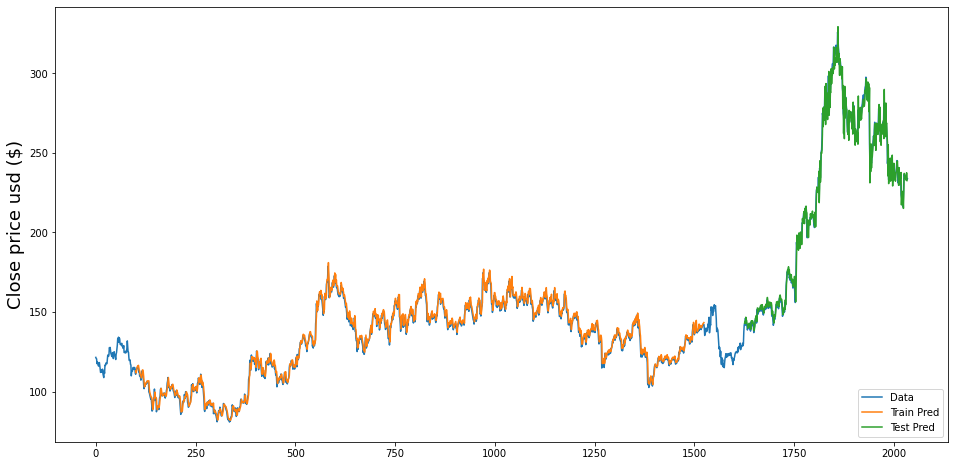

In [167]:
#ploting
#shift train predictions for ploting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back,:]=train_predict1
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1,:]=test_predict1
#plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
# plt.plot(data1['Close'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price usd ($)',fontsize=18)
plt.legend(['Data','Train Pred','Test Pred'],loc='lower right')
plt.show()


In [168]:
#start predicting for next 30 days
len(test_data)

509

In [169]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [170]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [171]:
len(temp_input)

100

In [173]:
#demonstrate predictions for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[0.6234023]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [174]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [175]:
len(df1)

2035

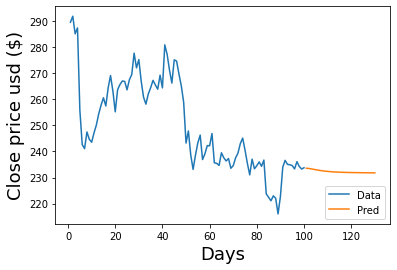

In [185]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
# plt.plot(day_new,scaler.inverse_transform(df1[200:300]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close price usd ($)',fontsize=18)
plt.legend(['Data','Pred'],loc='lower right')
plt.show()